(10, 2)
10
0.0 0.4521589882683238
0.4521589882683238 0.8746626533045715
0.8746626533045715 0.97881204644751
0.97881204644751 1.662013594501821
1.662013594501821 0.834694439201007
1.662013594501821 0.4424059250956955
1.662013594501821 0.9670063443233623
1.662013594501821 0.826267152222266
1.662013594501821 1.3696951556083594
1.662013594501821 0.45149581848696885
1.662013594501821 0.6035424005974542
1.662013594501821 0.6533146624530308
1.662013594501821 0.6605179443647997
1.662013594501821 0.22340211875590824
1.662013594501821 1.266546678594352
1.662013594501821 0.6692291525233206
1.662013594501821 2.6025159394578066
2.6025159394578066 1.043235014220883
2.6025159394578066 0.003223112300186386
2.6025159394578066 0.24475863338392417
2.6025159394578066 0.3767850089824229
2.6025159394578066 0.03750567250021742
2.6025159394578066 0.37125752442234905
2.6025159394578066 0.053785470502037115
2.6025159394578066 0.3703771926234356
2.6025159394578066 0.10475815468974861
2.6025159394578066 0.5618580

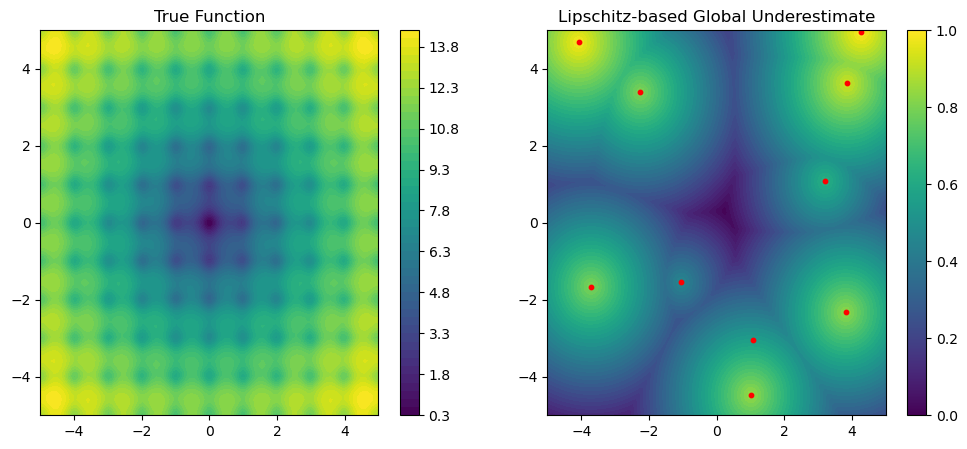

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def func2d(x, y, a=20, b=0.2, c=2 * np.pi):
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    return term1 + term2 + a + np.exp(1)

def lipschitz_global_underestimate(f_values, samplesXY, L, x_range, y_range):
    """
    Compute the Lipschitz-based global underestimate using all current samples.

    Parameters:
    f_values: np.ndarray of shape (n_samples,)
        The function values at the sampled points.
    samplesXY: np.ndarray of shape (n_samples, 2)
        Array of the sampled (x, y) points.
    L: float
        The Lipschitz constant.
    x_range: np.ndarray
        Array of x-values over which to compute the underestimate.
    y_range: np.ndarray
        Array of y-values over which to compute the underestimate.

    Returns:
    Z_under: np.ndarray
        The global Lipschitz-based underestimate values over the grid (x_range, y_range).
    """
    X, Y = np.meshgrid(x_range, y_range)
    Z_under = np.full_like(X, -np.inf)  # Initialize with very low values

    # Loop over all sample points to compute their individual underestimates
    for i, (x_i, y_i) in enumerate(samplesXY):
        f_x_i_y_i = f_values[i]
        
        # Compute the distance from each point (X, Y) to the sample point (x_i, y_i)
        distances = np.sqrt((X - x_i)**2 + (Y - y_i)**2)
        
        # Compute the local Lipschitz underestimate for this sample
        Z_local_under = f_x_i_y_i - L * distances
        
        # Update the global underestimate by taking the maximum across samples
        Z_under = np.maximum(Z_under, Z_local_under)
    
    return Z_under

def estimate_lipschitz_constant(samplesXY, f_values):
    """
    Estimate the Lipschitz constant based on known sample points and their function values.
    
    Parameters:
    samplesXY: np.ndarray of shape (n_samples, 2)
        Array of the sampled (x, y) points.
    f_values: np.ndarray of shape (n_samples,)
        Array of function values at the sampled points.
    
    Returns:
    L_est: float
        The estimated Lipschitz constant.
    """
    n_samples = samplesXY.shape[0]
    L_est = 0.0
    print(samplesXY.shape)
    print(n_samples)
    
    # Loop over all pairs of points to estimate L
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            # Compute the Euclidean distance between points i and j
            dist = np.linalg.norm(samplesXY[i] - samplesXY[j])
            if dist > 0:
                # Compute the absolute difference in function values
                f_diff = np.abs(f_values[i] - f_values[j])
                # Compute the slope and update the maximum
                print(L_est, f_diff/dist)
                L_est = max(L_est, f_diff / dist)
    
    return L_est

# Example: Generate a grid for x and y
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)

# Sample points for training (pretend these are known samples from an optimization process)
num_samples = 10
sampleX = np.random.uniform(-5, 5, size=num_samples)
sampleY = np.random.uniform(-5, 5, size=num_samples)
samplesXY = np.stack((sampleX, sampleY), axis=1)

# Function values at the sample points
f_values = func2d(samplesXY[:, 0], samplesXY[:, 1])

L_est = estimate_lipschitz_constant(samplesXY, f_values)
print(L_est)
# Assume a Lipschitz constant (this needs to be estimated or known for the problem)
L = L_est

# Compute the global Lipschitz-based underestimate for the entire 2D grid
Z_under = lipschitz_global_underestimate(f_values, samplesXY, L, x_range, y_range)

# Compute the true function values over the same range (for comparison)
X, Y = np.meshgrid(x_range, y_range)
Z_true = func2d(X, Y)

# Plot the Lipschitz underestimate and the true function


plt.figure(figsize=(12, 5))

# Plot the true function
plt.subplot(1, 2, 1)
plt.contourf(X, Y, Z_true, levels=50, cmap='viridis')
plt.colorbar()
plt.title("True Function")

# Plot the Lipschitz-based global underestimate
plt.subplot(1, 2, 2)
plt.contourf(X, Y, Z_under, levels=50, cmap='viridis')
plt.scatter(sampleX, sampleY, color='red', s=10)
plt.colorbar()
plt.title("Lipschitz-based Global Underestimate")

plt.show()

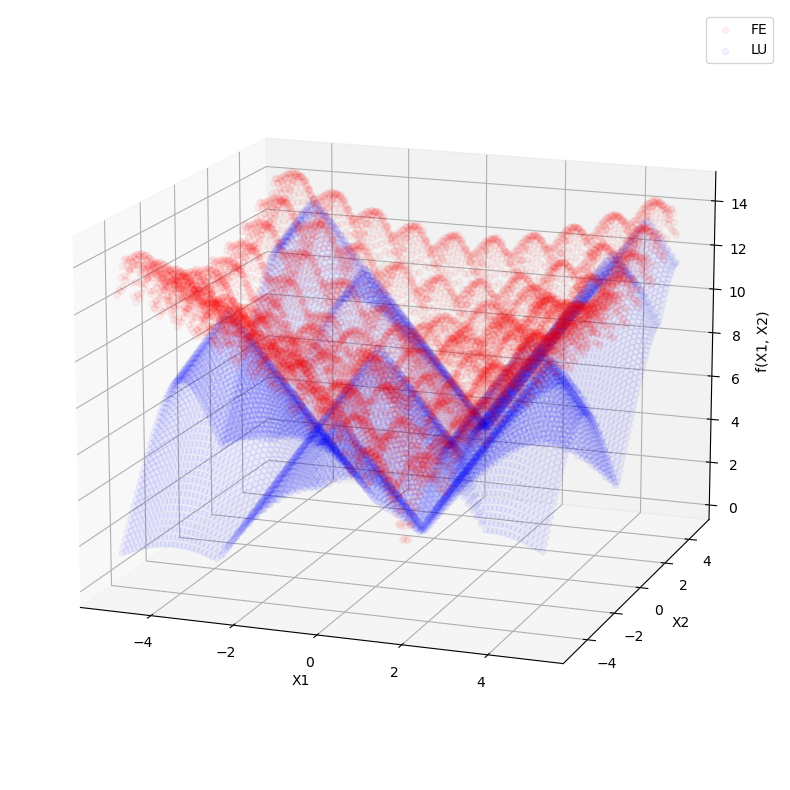

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the training data points
ax.scatter(X, Y, Z_true, c='r', label='FE', alpha = 0.05)

# Plot the predicted data points
ax.scatter(X, Y, Z_under, c='b', label='LU', alpha = 0.05)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
ax.view_init(15, 290) 
plt.legend()
plt.show()

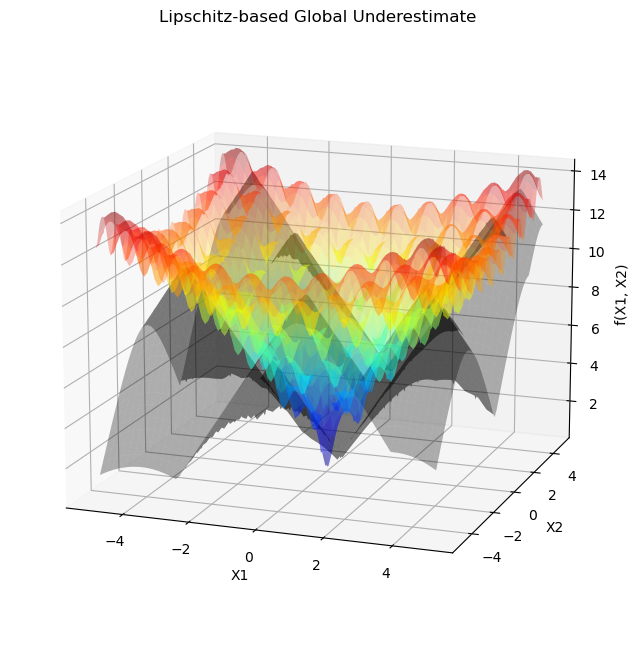

In [56]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the training data points
ax.plot_surface(X, Y, Z_true, cmap='jet', label='FE', alpha = 0.3)

# Plot the predicted data points
ax.plot_surface(X, Y, Z_under, color = 'k', label='LU', alpha = 0.3)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
ax.view_init(15, 290) 
plt.title('Lipschitz-based Global Underestimate')
# plt.legend()
plt.show()